UCSanDiegoX: DSE200x Python for Data Science

Week 3 - Jupyter Notebooks and Numpy

more about WIFIRE at: https://wifire.ucsd.edu/

In this example, we will analyze a sample satellite image dataset from WIFIRE using the numpy Library

In [2]:
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

# skimage.misc.imread() replaced by imageio.imread()
# from skimage import data
import imageio

In [85]:
photo_data = imageio.imread('./wifire/sd-3layers.jpg')
print(type(photo_data), isinstance(photo_data, np.ndarray))
# imageio.core.util.Image extends np.ndarray adding a meta attribute

<class 'imageio.core.util.Image'> True


Let's see what is in this image. 

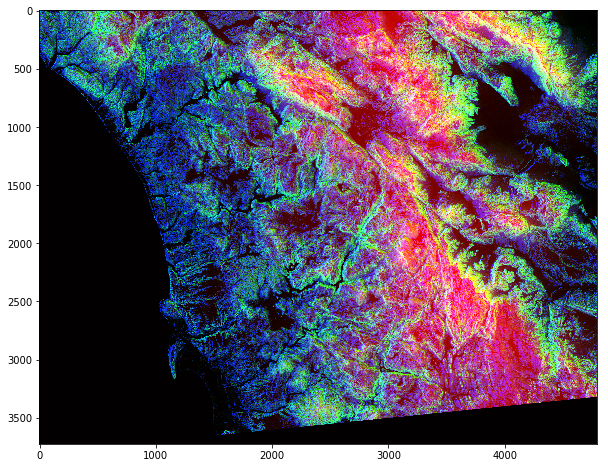

In [18]:
plt.figure(figsize=(10, 10))
plt.imshow(photo_data)

In [5]:
print(photo_data.shape, photo_data[0][0])

(3725, 4797, 3) [ 0 22 35]


The shape of the ndarray show that it is a three layered matrix. The first two numbers here are length and width, and the third number (i.e. 3) is for three layers: Red, Green and Blue.

RGB Color Mapping in the Photo:
- RED pixel indicates Altitude
- BLUE pixel indicates Aspect
- GREEN pixel indicates Slope

The higher values denote higher altitude, aspect and slope

In [19]:
print(photo_data.size)

# check if they are all good RGB values
photo_data.min(), photo_data.max()

53606475


(0, 255)

In [13]:
photo_data.mean()

75.8299354508947

Pixel on the 150th Row and 250th Column

In [21]:
# the pixel (150, 250) has a lot of blue in it
print(photo_data[150, 250])

# green value for it is 35
print(photo_data[150, 250, 1])

[ 17  35 255]
35


### Set a Pixel to All Zeros

We can set all three layer in a pixel as once by assigning zero globally to that (row,column) pairing. However, setting one pixel to zero is not noticeable.

before [ 17  35 255]
after [0 0 0]


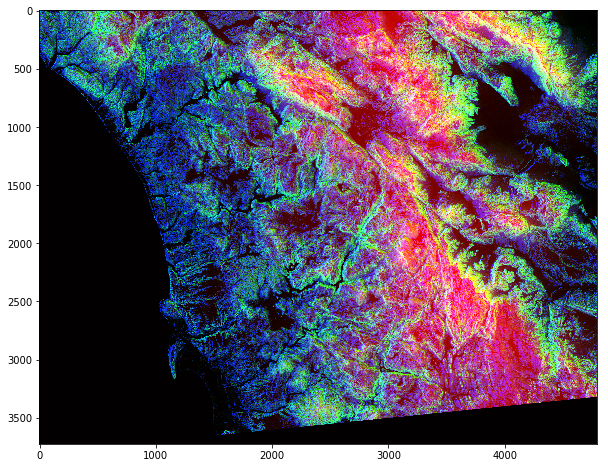

In [27]:
dummy = photo_data.copy()

# set single pixel to [0 0 0]
dummy[150, 250] = 0

plt.figure(figsize=(10,10))
plt.imshow(dummy)

### Changing colors in a Range

We can also use a range to change the pixel values. As an example, let's set the green layer for rows 200 t0 800 to full intensity.

[20 43  1] [ 37 255   0] [  2 255   1] [2 0 1]


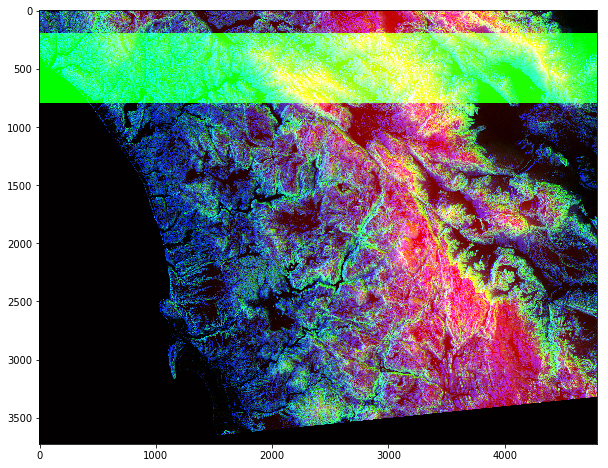

In [29]:
dummy = photo_data.copy()

# all pixel in rows [200, 800), Green is set to 255
dummy[200:800, : ,1] = 255
plt.figure(figsize=(10,10))
plt.imshow(dummy)

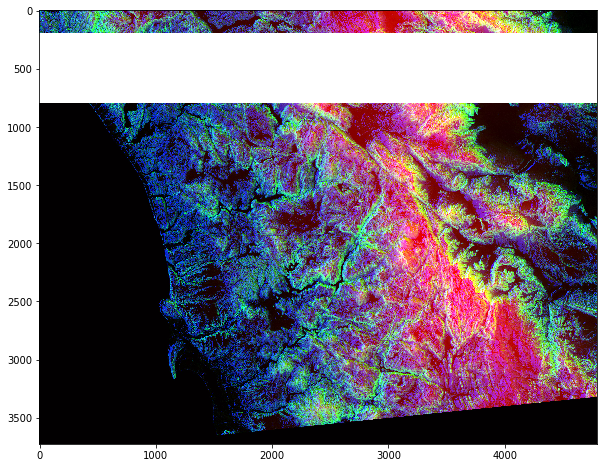

In [24]:
dummy = photo_data.copy()

# all RGB in the range are set to (255, 255, 255) i.e. white
dummy[200:800, :] = 255
plt.figure(figsize=(10,10))
plt.imshow(dummy)

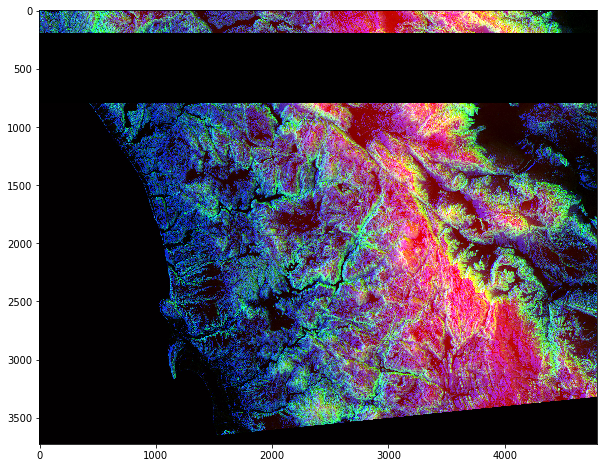

In [25]:
dummy = photo_data.copy()

# all RGB in the range are set to (0, 0, 0) i.e. black
dummy[200:800, :] = 0
plt.figure(figsize=(10,10))
plt.imshow(dummy)

### Pick all Pixels with Low Values

In [37]:
dummy = photo_data.copy()

# create a filter for points of limited interest
low_value_filter = dummy < 200
print(low_value_filter[150, 200])

# the filter has the same shape of the original ndarray
print("Shape of photo_data:", dummy.shape)
print("Shape of low_value_filter:", low_value_filter.shape)

[ True  True  True]
Shape of photo_data: (3725, 4797, 3)
Shape of low_value_filter: (3725, 4797, 3)


Filtering Out Low Values

Whenever the low_value_filter is True, set value to 0.

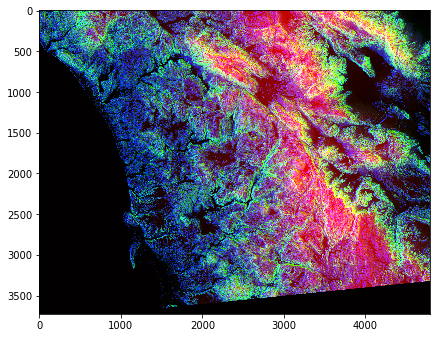

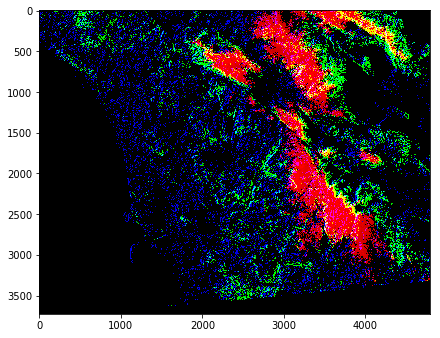

In [38]:
# the original picture
plt.figure(figsize=(7, 7))
plt.imshow(photo_data)

# the filtered picture
dummy[low_value_filter] = 0
plt.figure(figsize=(7, 7))
plt.imshow(dummy)

More Row and Column Operations

You can design complex patters by making cols a function of rows or vice-versa. Here we try a linear relationship between rows and columns.

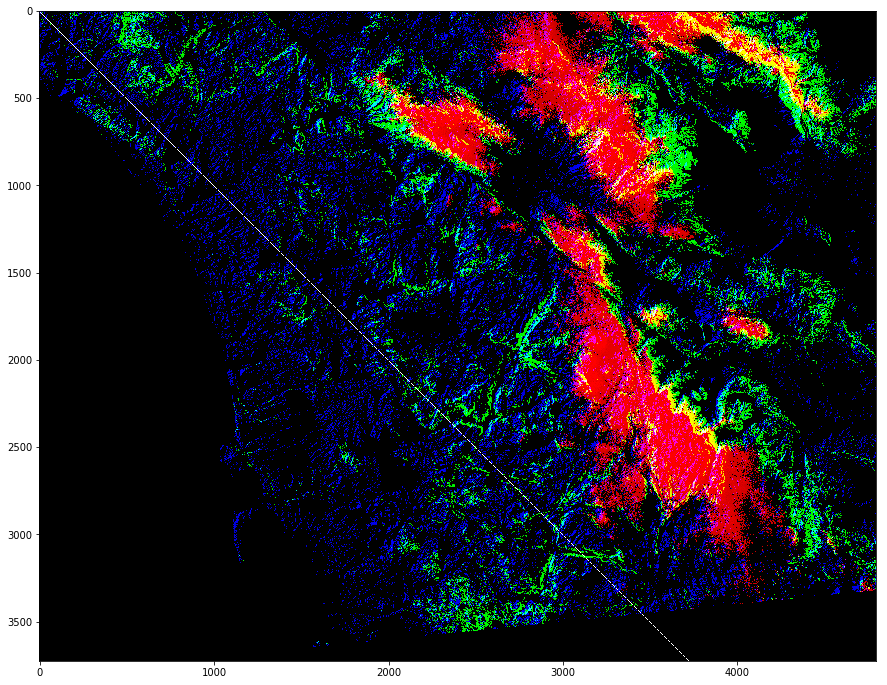

In [48]:
# draw a diagonal white line in the picture

rows_range = np.arange(len(photo_data))
dummy[rows_range, rows_range] = 255

plt.figure(figsize=(15, 15))
plt.imshow(dummy)

### Masking Images

Now let us try something even cooler...a mask that is in shape of a circular disc.

In [51]:
total_rows, total_cols, total_layers = photo_data.shape
print("photo_data:", photo_data.shape)

X, Y = np.ogrid[:total_rows, :total_cols]
print("X:", X.shape, "Y:", Y.shape)

photo_data: (3725, 4797, 3)
X: (3725, 1) Y: (1, 4797)


In [68]:
center_row, center_col = total_rows / 2, total_cols / 2
print("center:", center_row, center_col)

print('distances from center.x', (X - center_row)[0], '...', (X - center_row)[-1]) 
dist_from_center = (X - center_row)**2 + (Y - center_col)**2
radius = (total_rows / 2)**2
print("Radius = ", radius)
circular_mask = (dist_from_center > radius)
print(circular_mask[1500:1700,2000:2200])

center: 1862.5 2398.5
distances from center.x [-1862.5] ... [1861.5]
Radius =  3468906.25
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


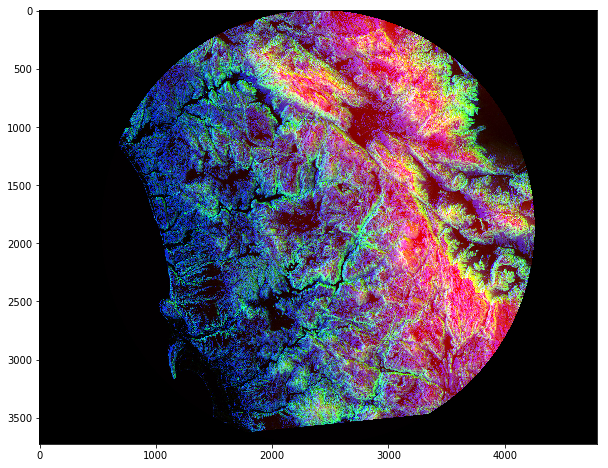

In [70]:
dummy = photo_data.copy()

dummy[circular_mask] = 0
plt.figure(figsize=(10, 10))
plt.imshow(dummy)

### Further Masking

You can further improve the mask, for example just get upper half disc

In [71]:
X, Y = np.ogrid[:total_rows, :total_cols]
half_upper = X < center_row # this line generates a mask for all rows above the center

half_upper_mask = np.logical_and(half_upper, circular_mask)

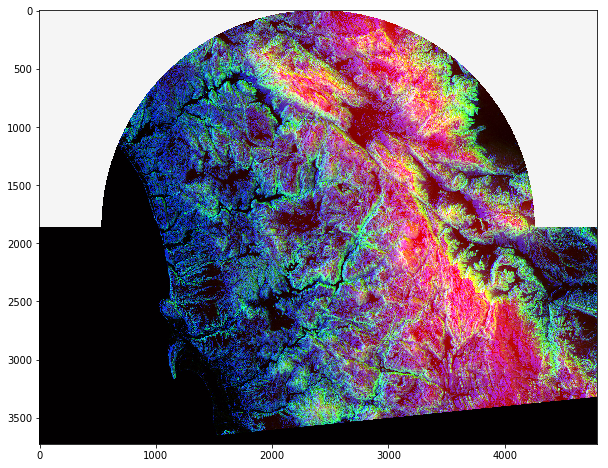

In [84]:
dummy = photo_data.copy()

dummy[half_upper_mask] = 255
# dummy[half_upper_mask] = random.randint(0,255)  # random shade instead of pure white
plt.figure(figsize=(10, 10))
plt.imshow(dummy)

Further Processing of our Satellite Imagery

Processing of RED Pixels

Remember that red pixels tell us about the height. Let us try to highlight all the high altitude areas. We will do this by detecting high intensity RED Pixels and muting down other areas.

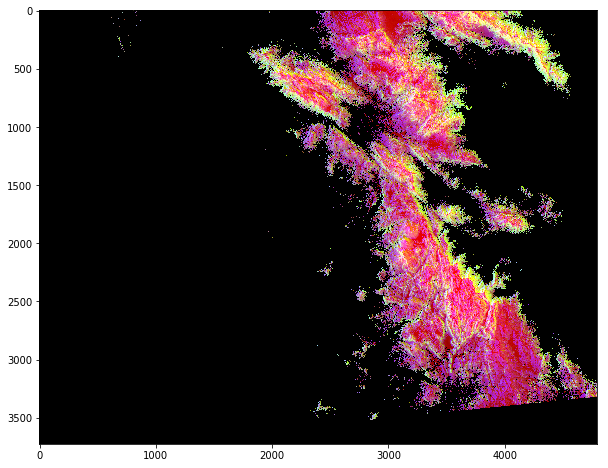

In [86]:
dummy = photo_data.copy()

# mask for low lever red
red_mask = dummy[:, : ,0] < 150

# show only high altitude points
dummy[red_mask] = 0
plt.figure(figsize=(10, 10))
plt.imshow(dummy)

Detecting High-GREEN Pixels

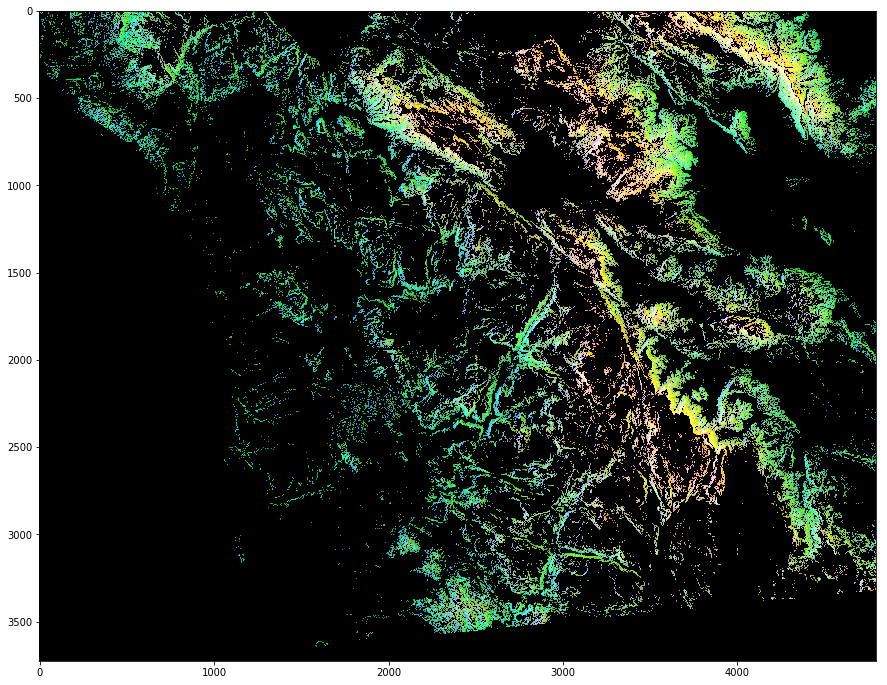

In [87]:
dummy = photo_data.copy()
green_mask = dummy[:, : ,1] < 150

dummy[green_mask] = 0
plt.figure(figsize=(15,15))
plt.imshow(dummy)

Detecting Highly-BLUE Pixels

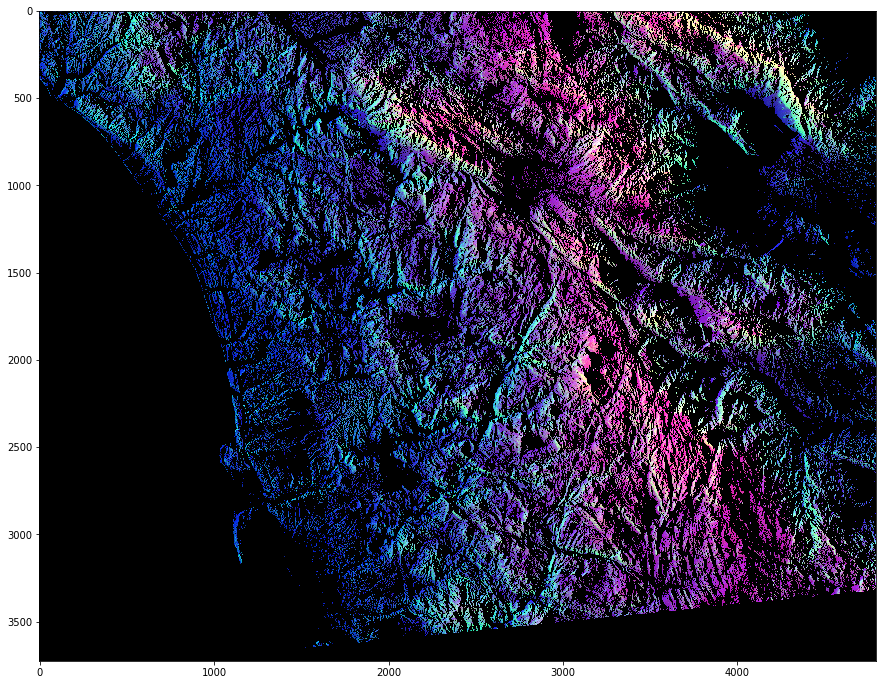

In [88]:
dummy = photo_data.copy()
blue_mask  = dummy[:, : ,2] < 150

dummy[blue_mask] = 0
plt.figure(figsize=(15,15))
plt.imshow(dummy)

Composite mask that takes thresholds on all three layers: RED, GREEN, BLUE

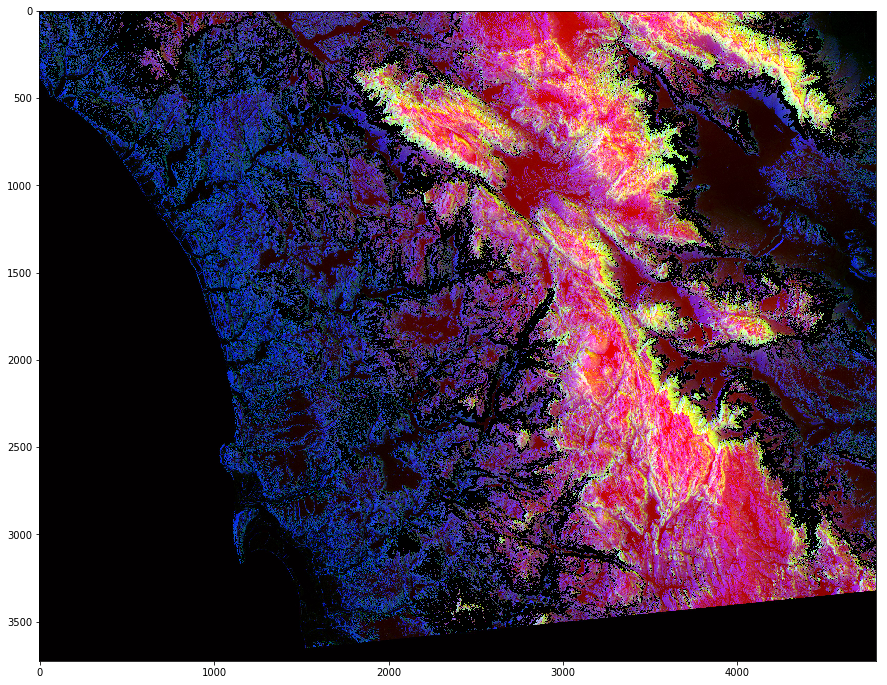

In [89]:
dummy = photo_data.copy()

red_mask = dummy[:, : ,0] < 150
green_mask = dummy[:, : ,1] > 100
blue_mask = dummy[:, : ,2] < 100

final_mask = np.logical_and(red_mask, green_mask, blue_mask)
dummy[final_mask] = 0
plt.figure(figsize=(15,15))
plt.imshow(dummy)